Importing Libraries

In [33]:
import pandas as pd
import numpy as np
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [7]:
import pandas as pd

# Read the original CSV file
df = pd.read_csv("NewHeadlines.csv")

# Select only the "Label" and "Title" columns
new_df = df[["LABEL", "Headline"]]

# Write the new DataFrame to a new CSV file
new_df.to_csv("Comment_Data.csv", index=False)

# Display the new DataFrame
print(new_df)


              LABEL                                           Headline
0         Elon Musk                                            Removed
1         Elon Musk  officials investigating Elon Musk over handlin...
2         Elon Musk  Lemon will longer have exclusive series former...
3         Elon Musk  Elon Musk spent better part year complaining a...
4         Elon Musk  Elon Musk said startup will open source Grok l...
..              ...                                                ...
495  Warren Buffett                                                NaN
496  Warren Buffett                                                NaN
497  Warren Buffett                                                NaN
498  Warren Buffett                                                NaN
499  Warren Buffett                                                NaN

[500 rows x 2 columns]


In [24]:
!pip install langdetect


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=9e64515d4e0b903af9be021262c8028f803d4a8cabb5ef35a7dd3528f1a51cde
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


Loading Data and Preprocessing

In [25]:
import pandas as pd
from langdetect import detect
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Read the original CSV file
df = pd.read_csv("NewHeadlines.csv")

# Select only the "LABEL" and "Headline" columns
new_df = df[["LABEL", "Headline"]]

# Write the new DataFrame to a new CSV file
new_df.to_csv("Comment_Data.csv", index=False)

# Load the data
data = pd.read_csv('Comment_Data.csv')

# Text preprocessing function
def preprocess_text(text):
    # Check if the input is a string, otherwise return an empty string
    if not isinstance(text, str):
        return ''

    # Lowercase the text
    text = text.lower()

    # Remove special characters and digits
    text = re.sub(r'[^a-z]+', ' ', text)

    # Tokenize the words
    words = text.split()

    # Filter out non-English words
    def filter_english(text):
        try:
            # Detect the language of the text
            lang = detect(text)
            # Return the text if it's English, otherwise return an empty string
            if lang == 'en':
                return text
            else:
                return ''
        except:
            return ''  # Skip text that couldn't be detected

    # Apply the language filtering
    filtered_text = filter_english(text)

    if filtered_text == '':
        return filtered_text  # Return empty string if the text is not English

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    # Join the words back into a single string
    text = ' '.join(words)

    return text

# Preprocess the data
data['Headline'] = data['Headline'].apply(preprocess_text)

# Display the preprocessed data
print(data.head())


       LABEL                                           Headline
0  Elon Musk                                                   
1  Elon Musk  official investigating elon musk handling twit...
2  Elon Musk  lemon longer exclusive series former host say ...
3  Elon Musk  elon musk spent better part year complaining i...
4  Elon Musk  elon musk said startup open source grok later ...


Splitting the data in Training and Testing Data

In [26]:
# Split the data into Training and Testing sets
X = data['Headline']
y = data['LABEL']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
print(X_train, X_test, y_train, y_test)

249                                                     
433                                                     
19     tesla elon musk tell staff mandatory north ame...
322    three year boycott plummeting rating major ove...
332    band moment investor strong stock index gain c...
                             ...                        
106    billionaire like elon musk jeff bezos huge pla...
270                                 bill gate terrapower
348                                                     
435    come stock investing many people assume best r...
102    jeff bezos earth fund dedicating million impro...
Name: Headline, Length: 400, dtype: object 361    swarm bee forced nearly hour disruption quarte...
73     analyst indicated number daily user falling ye...
374    larry ellison said oracle working spacex creat...
155                                                     
104    altman cited post musk sent jeff bezos silver ...
                             ...             

In [29]:
# Convert text data to numerical features
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)


In [31]:
X_train_df = pd.DataFrame(X_train_vectorized.toarray(), columns=vectorizer.get_feature_names_out())

print(X_train_df)


     ability  able  aboard  abruptly  access  according  account  accountable  \
0        0.0   0.0     0.0       0.0     0.0        0.0      0.0          0.0   
1        0.0   0.0     0.0       0.0     0.0        0.0      0.0          0.0   
2        0.0   0.0     0.0       0.0     0.0        0.0      0.0          0.0   
3        0.0   0.0     0.0       0.0     0.0        0.0      0.0          0.0   
4        0.0   0.0     0.0       0.0     0.0        0.0      0.0          0.0   
..       ...   ...     ...       ...     ...        ...      ...          ...   
395      0.0   0.0     0.0       0.0     0.0        0.0      0.0          0.0   
396      0.0   0.0     0.0       0.0     0.0        0.0      0.0          0.0   
397      0.0   0.0     0.0       0.0     0.0        0.0      0.0          0.0   
398      0.0   0.0     0.0       0.0     0.0        0.0      0.0          0.0   
399      0.0   0.0     0.0       0.0     0.0        0.0      0.0          0.0   

     accuracy  accused  ...

Confusion Matrix:
 [[ 7  0  1  2  0]
 [ 6 20  2  0  0]
 [ 6  0  5  1  2]
 [ 9  2  2  9  2]
 [17  0  1  0  6]]
Accuracy: 0.47


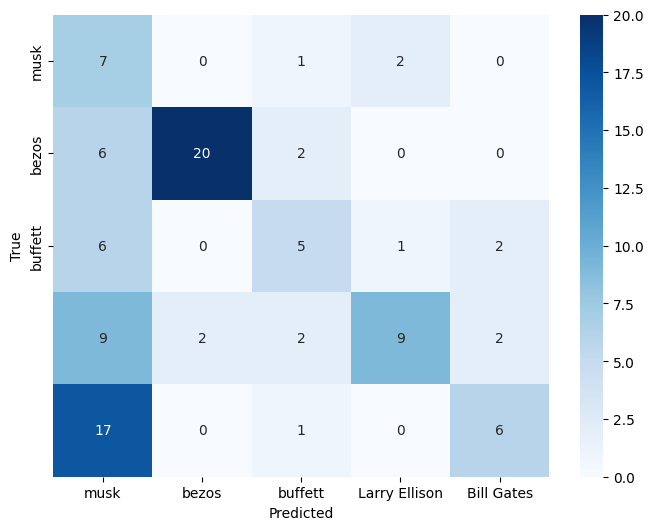

In [36]:
# Train the Naïve Bayes model
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vectorized, y_train)

# Test the model on the Testing Set
y_pred = nb_classifier.predict(X_test_vectorized)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['musk', 'bezos', 'buffett',"Larry Ellison", "Bill Gates"], yticklabels=['musk', 'bezos', 'buffett'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Percentage wise Confusion Matrix

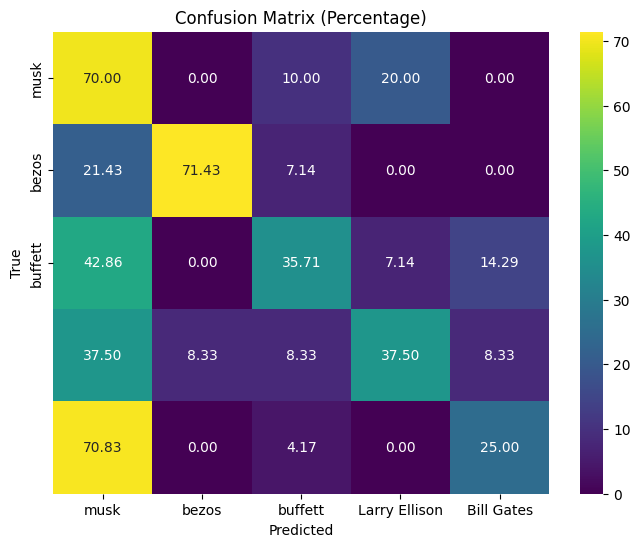

In [38]:
# Calculate the percentage confusion matrix
conf_matrix_percentage = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis]
conf_matrix_percentage = np.round(conf_matrix_percentage * 100, 2)

# Visualize the percentage confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percentage, annot=True, fmt='.2f', cmap='viridis', xticklabels=['musk', 'bezos', 'buffett',"Larry Ellison","Bill Gates"], yticklabels=['musk', 'bezos', 'buffett'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Percentage)')
plt.show()
